# Projet Intelligence Artificielle

Groupe 4 :
- Zittel Laureline
- SEITZ Tom
- WALTER Loïc
- CHAMPY Hugo

In [95]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Import librairy

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, precision_recall_curve

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit

from scipy.cluster.hierarchy import dendrogram, linkage


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [97]:
def data_loader(csv_path):
    return pd.read_csv(csv_path)

## Import employee_survey_data.csv

In [98]:
employeeSurveyDf = data_loader(csv_path="./data/employee_survey_data.csv")
employeeSurveyDf

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


## Import general_data.csv

In [99]:
generalDf = data_loader(csv_path="./data/general_data.csv")
generalDf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## Import manager_survey_data.csv

In [100]:
managerSurveyDf = data_loader(csv_path="./data/manager_survey_data.csv")
managerSurveyDf

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


## Import in_time.csv

In [101]:
in_time_df = data_loader(csv_path="./data/in_time.csv")
in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_df.replace("NaN", pd.NA, inplace=True)
in_time_df.set_index('EmployeeID', inplace=True)

out_time_df = data_loader(csv_path="./data/out_time.csv")
out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_df.replace("NaN", pd.NA, inplace=True)
out_time_df.set_index('EmployeeID', inplace=True)

in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
out_time_df.iloc[:, 1:] = out_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

time_diff_df = out_time_df - in_time_df
time_diff_df.replace("NaT", pd.NA, inplace=True)
# print(time_diff_df.head())
# print(time_diff_df.info())

timedelta_columns = time_diff_df.iloc[:, 1:]  # Adjust column selection as necessary

seconds_diff_df = timedelta_columns.applymap(lambda x: x.total_seconds() if pd.notnull(x) else np.nan)

# Compute the mean ignoring NaN across columns for each row
average_seconds = seconds_diff_df.mean(axis=1)

# Convert the average seconds back to a timedelta
average_timedelta = pd.to_timedelta(average_seconds, unit='s')

# If you want to associate these average times back with their respective EmployeeID
average_timedelta_with_id = pd.concat([average_timedelta], axis=1)
average_timedelta_with_id.columns = ['AverageTimeSpent']

# Now average_timedelta_with_id should be a DataFrame where:
# - The 'EmployeeID' column retains the original IDs
# - The 'AverageTimeSpent' column holds the calculated average timedelta per employee
print(average_timedelta_with_id.head())

average_timedelta_with_id["AverageTimeSpent"] = average_timedelta_with_id["AverageTimeSpent"].dt.total_seconds().floordiv(3600).astype(int)
average_timedelta_with_id

#group by <7 hours, 7-9 hours, >0 hours
bins = [0, 7, 9, 24]
labels = ['<7h', '7-9h', '>9h']
average_timedelta_with_id['AverageTimeSpent'] = pd.cut(average_timedelta_with_id['AverageTimeSpent'], bins=bins, labels=labels)
average_timedelta_with_id

/var/folders/w3/3csmr5h95yq7739v2cfghzl80000gn/T/ipykernel_15357/4287667051.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-14, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
/var/folders/w3/3csmr5h95yq7739v2cfghzl80000gn/T/ipykernel_15357/4287667051.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-26, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please ex

                    AverageTimeSpent
EmployeeID                          
1          0 days 07:22:25.142241379
2          0 days 07:43:08.288135593
3          0 days 07:00:47.665289256
4          0 days 07:11:37.242553191
5          0 days 08:00:22.228571429


,AverageTimeSpent
EmployeeID,
1,<7h
2,<7h
3,<7h
4,<7h
5,7-9h
...,...
4406,7-9h
4407,<7h
4408,<7h


## Merge dataframes

In [102]:
mergedDataframe = pd.merge(employeeSurveyDf, generalDf, on='EmployeeID')
mergedDataframe = pd.merge(mergedDataframe, managerSurveyDf, on='EmployeeID')
mergedDataframe = pd.merge(mergedDataframe, average_timedelta_with_id, on='EmployeeID')
mergedDataframe.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeSpent
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,<7h
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,<7h
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,<7h
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,8,3,13.0,5,8,7,5,2,3,<7h
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,8,2,9.0,2,6,0,4,3,3,7-9h


Get some information on the data structure

In [103]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   float64 
 2   JobSatisfaction          4390 non-null   float64 
 3   WorkLifeBalance          4372 non-null   float64 
 4   Age                      4410 non-null   int64   
 5   Attrition                4410 non-null   object  
 6   BusinessTravel           4410 non-null   object  
 7   Department               4410 non-null   object  
 8   DistanceFromHome         4410 non-null   int64   
 9   Education                4410 non-null   int64   
 10  EducationField           4410 non-null   object  
 11  EmployeeCount            4410 non-null   int64   
 12  Gender                   4410 non-null   object  
 13  JobLevel                 4410 non-null   int64   
 14  JobRole 

Hist

## Removing useless cols

Ces colonnes sont inutiles car elles ont toutes la même valeur. EmployeeID est utile pour fusionner des données, mais une fois cela fait, il ne nous donne aucune information intéressante.

In [104]:
mergedDataframe.drop(['EmployeeCount'], axis=1, inplace=True)
mergedDataframe.drop(['Over18'], axis=1, inplace=True)
mergedDataframe.drop(['StandardHours'], axis=1, inplace=True)
mergedDataframe.drop(['EmployeeID'], axis=1, inplace=True)
mergedDataframe.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeSpent
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,<7h
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,<7h
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,<7h
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,<7h
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,7-9h


# Remapping the data

In [105]:
# remplacement des strings par des entiers
mergedDataframe['Attrition'] = mergedDataframe['Attrition'].map({'Yes': 1, 'No': 0})
mergedDataframe['Gender'] = mergedDataframe['Gender'].map({'Female': 0, 'Male': 1})

# regrouper par classe de salaire en 6 groupes de 0 à 200000
mergedDataframe['MonthlyIncome'] = pd.cut(mergedDataframe['MonthlyIncome'], bins=[0, 33333, 66666, 100000, 133333, 166666, 200000], labels=[0, 1, 2, 3, 4, 5])
mergedDataframe.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,AverageTimeSpent
0,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,<7h
1,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,<7h
2,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,<7h
3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,<7h
4,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,7-9h


# Dendrogram

In [106]:
# dendroDF = mergedDataframe.copy()
# dendroDF['Attrition'] = dendroDF['Attrition'].map({'Yes': 1, 'No': 0})
# dendroDF.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'], axis=1, inplace=True)

# median = dendroDF["EnvironmentSatisfaction"].median()
# dendroDF["EnvironmentSatisfaction"].fillna(median, inplace=True)

# median = dendroDF["JobSatisfaction"].median()
# dendroDF["JobSatisfaction"].fillna(median, inplace=True)

# median = dendroDF["WorkLifeBalance"].median()
# dendroDF["WorkLifeBalance"].fillna(median, inplace=True)

# median = dendroDF["NumCompaniesWorked"].median()
# dendroDF["NumCompaniesWorked"].fillna(median, inplace=True)

# median = dendroDF["TotalWorkingYears"].median()
# dendroDF["TotalWorkingYears"].fillna(median, inplace=True)

# dendroDF.info()
# dendrogram(linkage(dendroDF, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)


In [107]:
# Assuming mergedDataframe is already defined earlier in your code

# for category in mergedDataframe.columns:
#     # Getting counts for both attrition and non-attrition by the current category
#     attrition_counts = mergedDataframe.groupby([category, 'Attrition']).size().unstack(fill_value=0)

#     # Calculate percentages
#     total = attrition_counts.sum(axis=1) # Total counts (attrition + non-attrition) for each category
#     percentages = attrition_counts.div(total, axis=0) * 100 # Calculate the percentages
    
#     # Plotting
#     ax = percentages.plot(kind='bar', figsize=(10, 6), title=f'Percentage of Attrition and Non-Attrition by {category}', stacked=False)
    
#     plt.xlabel(category)
#     plt.ylabel('Percentage')
    
#     # Annotate each bar with its percentage value for both Attrition and Non-Attrition
#     for p in ax.patches:
#         annotation = "{:.1f}%".format(p.get_height())
#         ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#     plt.ylim(0, 100)  # Adjust the y-axis to show percentages clearly
#     plt.show()
    

## Matrice de corrélation

A présent, nous cherchons à connaitre les données qui sont corrélées entre elles.

En effet, des paramètres inter-dépendants peuvent entrainer un mauvais entraineent du modèle, et donc fausser les résultats en sortie. 

Une fois les données corrélées repérées, nous pourrons choisir de supprimer certaines colonnes afin d'avoir uniquement des paramètres indépendants en entrée du modèle.

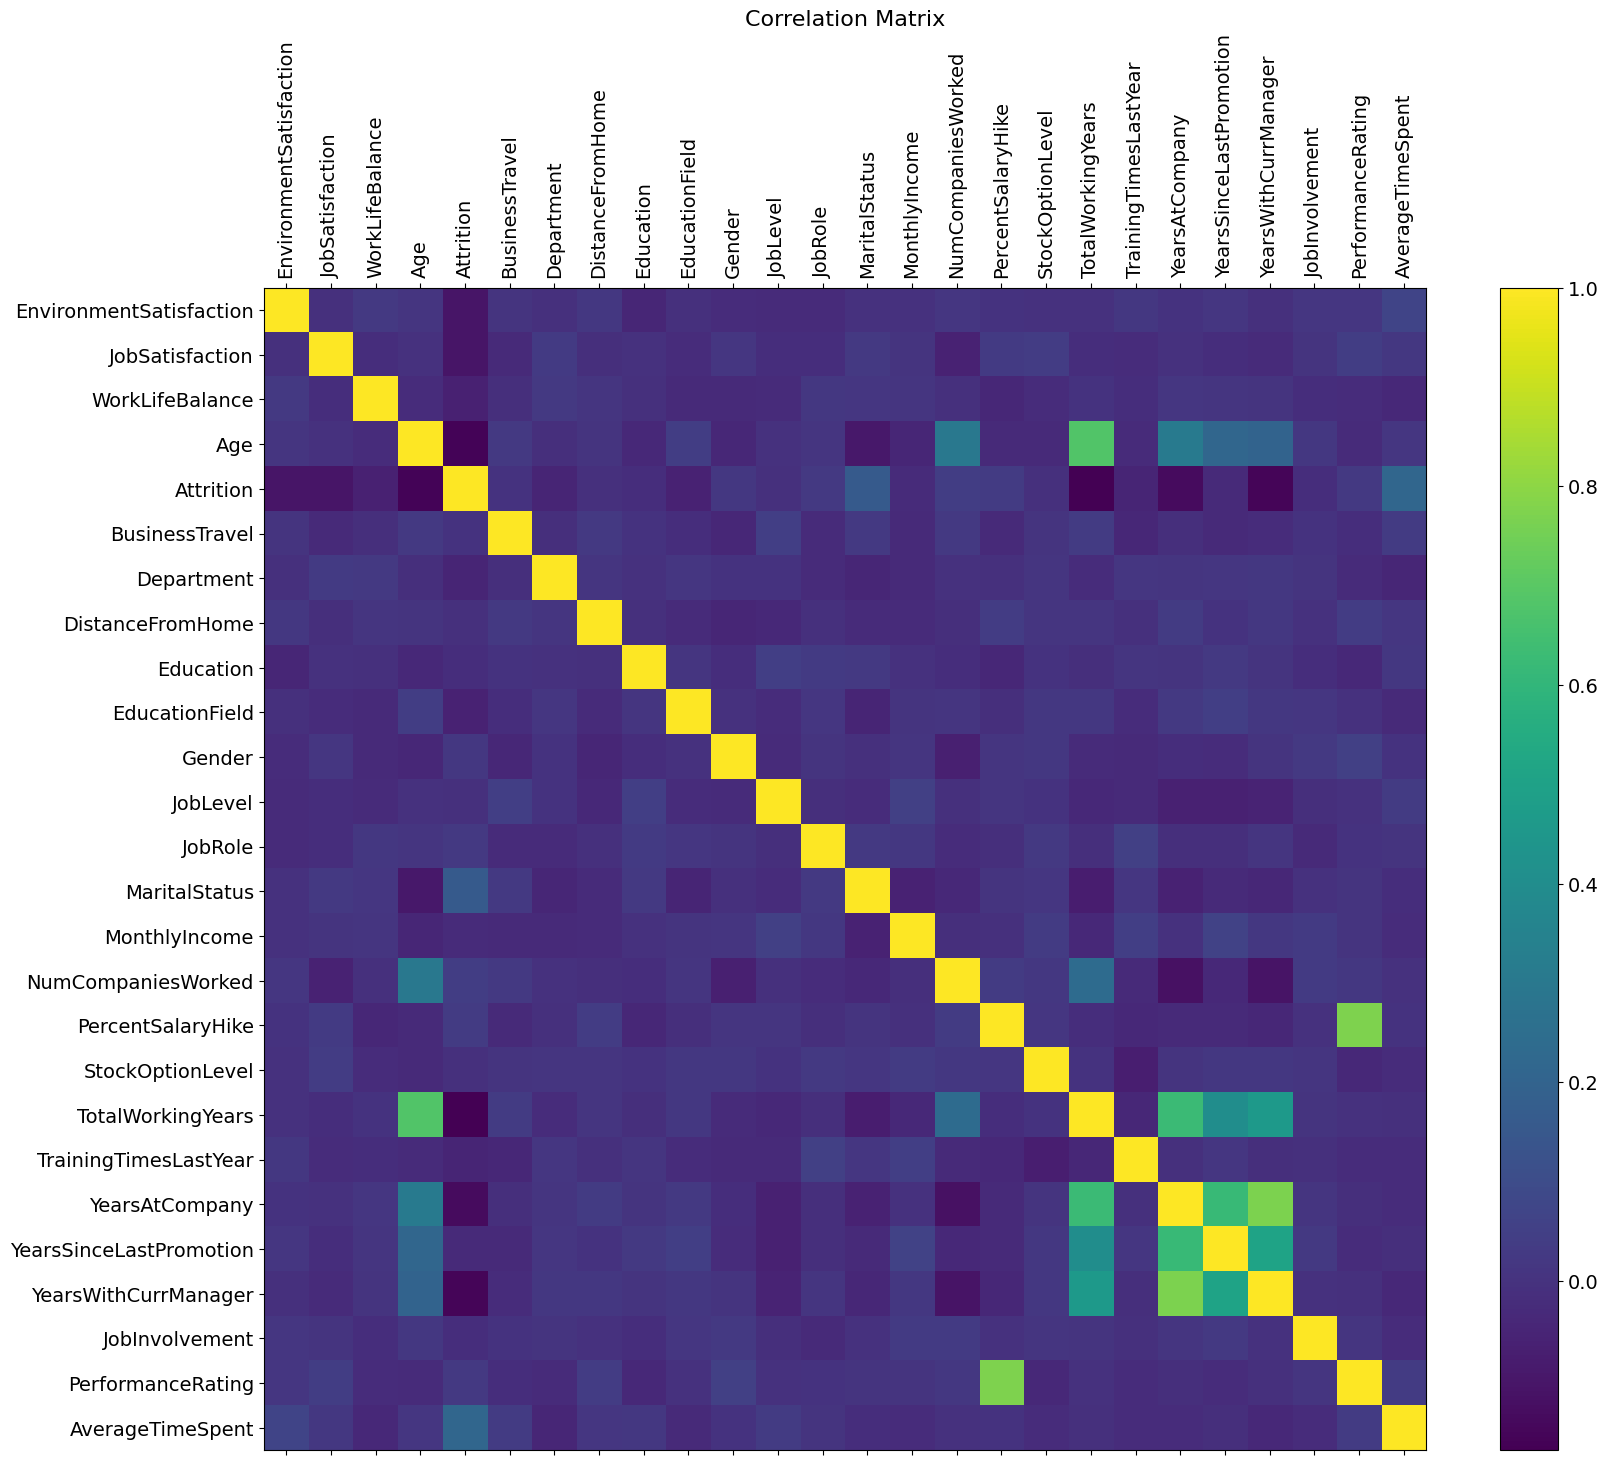

In [108]:
# Copy dataframe to avoid modifying the original dataframe
plottingDF = mergedDataframe.copy()

# Replace category with numerical values just for plotting
plottingDF['BusinessTravel'] = plottingDF['BusinessTravel'].astype('category').cat.codes
plottingDF['Department'] = plottingDF['Department'].astype('category').cat.codes
plottingDF['EducationField'] = plottingDF['EducationField'].astype('category').cat.codes
plottingDF['JobRole'] = plottingDF['JobRole'].astype('category').cat.codes
plottingDF['MaritalStatus'] = plottingDF['MaritalStatus'].astype('category').cat.codes
plottingDF['AverageTimeSpent'] = plottingDF['AverageTimeSpent'].astype('category').cat.codes



# Calculate the correlation matrix
corr = plottingDF.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
# show axis label for each line and column
plt.xticks(range(plottingDF.shape[1]), plottingDF.columns, fontsize=14, rotation=90)
plt.yticks(range(plottingDF.shape[1]), plottingDF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation_matrix.png')


On constate que certaines données sont **très corrélées entre elles**. Nous allons donc devoir faire un choix sur les colonnes à garder.

Nous avons dévider de **supprimer** les colonnes suivantes:
- ***YearsAtCompany*** : corrélé avec TotalWorkingYears, YearsSinceLastPromotion, YearsWithCurrManager. Nous souhaitons garder YearsWithCurrManager qui nous emble être un indicateur important pour prédire le départ d'un employé. Nous devons donc supprimer YearsAtCompany afins de ne pas avoir de données corrélées.
- ***TotalWorkingYears*** : corrélé avec Age, YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany. Nous avons choisi de garder Age, car c'est une donnée qui nous semble plus intéressante à garder.
- ***YearsSinceLastPromotion*** : corrélé avec YearsWithCurrManager, YearsAtCompany, TotalWorkingYears. Nous avons supprimé YearsSinceLastPromotion car nous avons constaté sur les graphiques que nous affichons précédamment que les personnes qui ont tendances à partir le plus, sont celles qui ont un nouveau manager depuis peu. Alors que les personnes qui ont un même manager depuis longtemps ont tendance à rester.
- ***PerformanceRating*** : corrélé avec PercentSalaryHike. Nous avons choisi de garder PercentSalaryHike, étant donné que cette donnée est précise et factuelle, tandis que PerformanceRating une note donnée par le manager, et donc subjective.

In [109]:
# Drop columns with correlation
mergedDataframe.drop(['YearsAtCompany'], axis=1, inplace=True)
mergedDataframe.drop(['YearsSinceLastPromotion'], axis=1, inplace=True)
mergedDataframe.drop(['TotalWorkingYears'], axis=1, inplace=True)
mergedDataframe.drop(['PerformanceRating'], axis=1, inplace=True)

## Gestion des données manquantes

Maintenant que nous avons supprimé les colonnes corrélées, il ne nous reste uniquement les données qui nous intéressent.

Nous allons donc continuer en corrigeant les données manquantes. Nous allons remplir les données manquantes avec la médiane des données, qui possède le plus de chance de ne pas fausser les résultats.

In [110]:
# This code shows the process of imputing missing values in the numeric columns. It will be implemented in the transformation pipeline later.

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the numeric columns
num_data = mergedDataframe.select_dtypes(include=np.number)
imputer.fit(num_data)

# Transform and replace the numeric columns
num_data_trans = imputer.transform(num_data)
df_num_trans = pd.DataFrame(data=num_data_trans, columns=num_data.columns)
#print(df_num_trans)

df_cat_data = mergedDataframe.drop(num_data.columns, axis=1)
#print(df_cat_data)

df_corrected = pd.concat([df_num_trans, df_cat_data], axis=1)

df_corrected


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,NumCompaniesWorked,...,TrainingTimesLastYear,YearsWithCurrManager,JobInvolvement,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,MonthlyIncome,AverageTimeSpent
0,3.0,4.0,2.0,51.0,0.0,6.0,2.0,0.0,1.0,1.0,...,6.0,0.0,3.0,Travel_Rarely,Sales,Life Sciences,Healthcare Representative,Married,3,<7h
1,3.0,2.0,4.0,31.0,1.0,10.0,1.0,0.0,1.0,0.0,...,3.0,4.0,2.0,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Single,1,<7h
2,2.0,2.0,1.0,32.0,0.0,17.0,4.0,1.0,4.0,1.0,...,2.0,3.0,3.0,Travel_Frequently,Research & Development,Other,Sales Executive,Married,5,<7h
3,4.0,4.0,3.0,38.0,0.0,2.0,5.0,1.0,3.0,3.0,...,5.0,5.0,2.0,Non-Travel,Research & Development,Life Sciences,Human Resources,Married,2,<7h
4,4.0,1.0,3.0,32.0,0.0,10.0,1.0,1.0,1.0,4.0,...,2.0,4.0,3.0,Travel_Rarely,Research & Development,Medical,Sales Executive,Single,0,7-9h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4.0,1.0,3.0,42.0,0.0,5.0,4.0,0.0,1.0,3.0,...,5.0,2.0,3.0,Travel_Rarely,Research & Development,Medical,Research Scientist,Single,1,7-9h
4406,4.0,4.0,3.0,29.0,0.0,2.0,4.0,1.0,1.0,2.0,...,2.0,2.0,2.0,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Divorced,0,<7h
4407,1.0,3.0,3.0,25.0,0.0,25.0,2.0,1.0,2.0,0.0,...,4.0,2.0,3.0,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married,1,<7h
4408,4.0,1.0,3.0,42.0,0.0,18.0,2.0,1.0,1.0,0.0,...,2.0,8.0,2.0,Travel_Rarely,Sales,Medical,Laboratory Technician,Divorced,0,7-9h


## Split

Nous allons maintenant séparer les données en deux groupes: les données d'entrainement et les données de test.
De cette façon, nous pourrons entrainer notre modèle sur les données d'entrainement, et le valider sur les données de test.

Nous séparons les données en 80% pour l'entrainement et 20% pour le test.

Les données sont séparée en respectant la proportion de départ de la colonne *WorkLifeBalance* dans chaque groupe. Nous avons choisi cette colonne car elle nous semble être un bon indicateur pour prédire le départ d'un employé.

In [111]:
# Splitting the data into training and testing sets
# Stratified sampling based on the 'WorkLifeBalance' column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_corrected, df_corrected['WorkLifeBalance']):
    print(train_index, test_index)
    df_train_set = df_corrected.loc[train_index]
    df_test_set = df_corrected.loc[test_index]


[3653  124 4383 ...  891   24 2283] [3751 3478 2266  262 1674 2410 4356 2823  387 1553 2481 2278 3253   90
 1623  663 4402 2123 3869 4149  537 3370 2734 4218 3760 3777 1194 3504
 3428 3035 2025 4119 1759 2716 3291 1607  739 3321  469 3501 1317  492
 3846 1302  844 3626  125 2477 3438 1843 1570    7 2268 1710 4069  260
 2547 3116 1527 1128 1956 2327  777 2565 4247 2127  859 3703 2483 1928
 2390 3830 2157 1007 1503  234  181  372 3987 1971 1608  331 3823 2720
 3182 3103 2870 3072 1500 2146 1360 2015  241  127  162 1609 4175 2537
 3423 2290 3169  351  690 2673 1797  862 4391 1245 1604 4404 4250  955
 2294 1529 4108  806 2835  649  196 4114 3677 2635 1345 3130 2971  907
 2617  771  529 1976  441 4253 3301 2307 2095 3274  575   62 1935 3399
  584  642  572 3261 3166 1293 1466 1272 2878  731  349 3655 3537 3113
 3333  202 1563 2239 2093 2462 1201 1904 2341  498 3791 1454 1968 4203
 3184 2772 1365 2359 3709 1464 2179  664 2067  157 4240 2768   40  790
  225 2020 3897   63 2542 1846 3605 4057 

Nous gardons également les données de la colonne *Attrition* dans un dataframe à part, puisque c'est la colonne que nous souhaitons prédire à partir des autres données.

In [112]:
X_train = df_train_set.drop(['Attrition'], axis=1)
y_train = df_train_set['Attrition'].copy()
X_test = df_test_set.drop(['Attrition'], axis=1)
y_test = df_test_set['Attrition'].copy()

y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

## Pipeline

Nous allons maintenant créer un pipeline de transformation pour préparer les données à être entrainées par un modèle.

Nous créons une premier pipeline pour les données numériques, et un deuxième pour les données catégorielles, qui inclu le premier pipeline.

In [113]:
# Numerical Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [114]:
# Categorical Pipeline

num_attribs = X_train.select_dtypes(include=np.number).columns
cat_attribs = X_train.select_dtypes(include='object').columns

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Dataframe prepared with the full pipeline, ready for the model
X_train_prepared = full_pipeline.fit_transform(X_train)

## 1er modèle : Random Forest

Nous allons maintenant entrainer un premier modèle sur les données d'entrainement.

Le premier modèle que nous allons entrainer est un modèle de Random Forest.

In [115]:
# Random Forest model
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

#Cross-Validation
forest_scores = cross_val_predict(forest_clf, X_train_prepared, y_train_1, cv=10)


### Matrice de confusion

Nous vérifions la qualité du modèle en utilisant une matrice de confusion.

Celle-ci nous donne des informations sur les erreurs de prédiction du modèle.

Nous utiliserons les indicaeurs suivants pour évaluer la qualité du modèle:
- **Precision** : Correspond à la proportion de nombre de vrai positif par rapport au nombre de positif total prédit par le modèle.

$$
\text{Precision} = \frac{\text{VP}}{\text{VP} + \text{FP}}
$$

- **Recall** : Correspond à la proportion de nombre de vrai positif par rapport au nombre de positif total réel.

$$
\text{Recall} = \frac{\text{VP}}{\text{VP} + \text{FN}}
$$

- **F1-score** : Correspond à la moyenne harmonique de la precision et du recall.

$$
\text{F1-score} = 2 \times \frac{\text{Précision} \times \text{Recall}}{\text{Précision} + \text{Recall}}
$$

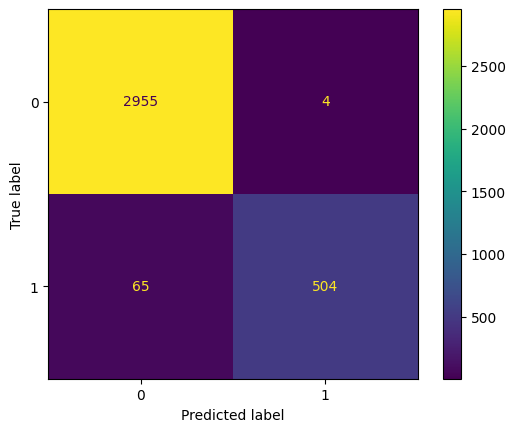

In [116]:
# Confusion Matrix
confMatrix = confusion_matrix(y_train_1, forest_scores)

disp = ConfusionMatrixDisplay(confusion_matrix=confMatrix)
disp.plot()


In [117]:
# Precision, Recall and F1 Score
forest_precision = precision_score(y_train_1, forest_scores)
forest_recall = recall_score(y_train_1, forest_scores)

forest_f1 = f1_score(y_train_1, forest_scores)
print(f'Precision: {forest_precision}')
print(f'Recall: {forest_recall}')
print(f'F1 Score: {forest_f1}')

Precision: 0.9921259842519685
Recall: 0.8857644991212654
F1 Score: 0.935933147632312


In [118]:
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared, y_train_1, cv=10, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores_forest)

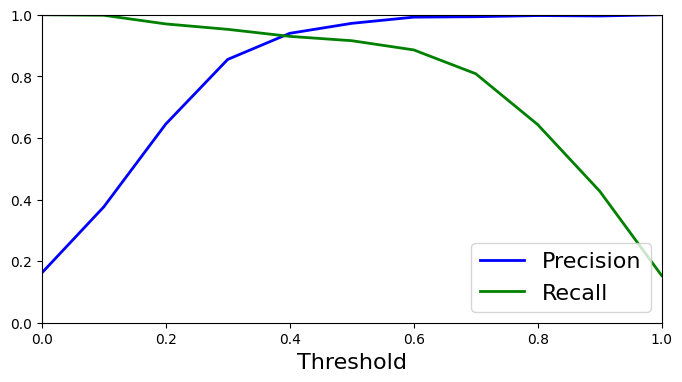

In [119]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()

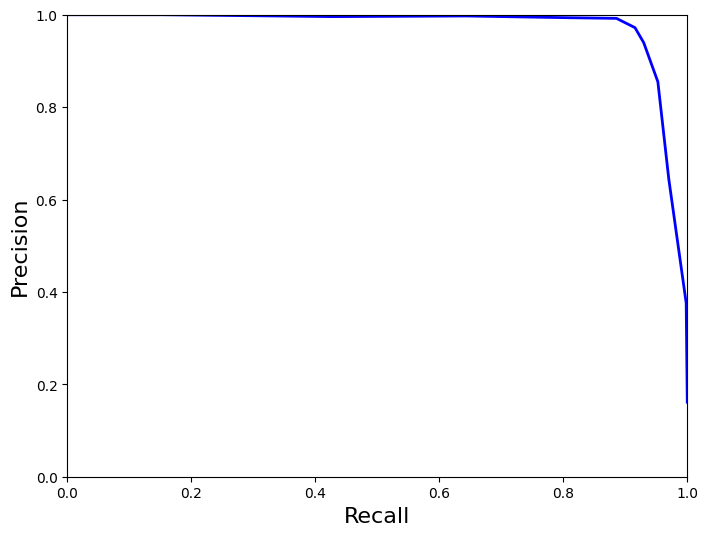

In [120]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### Courbe ROC:

La courbe ROC est un graphique qui permet de visualiser la qualité d'un modèle de classification binaire.
Nous l'utiliserons donc pour comparer la qualité des modèles que nous utiliserons afin de définir lequel est le plus pertinent.

l'objectif est d'avoir une courbe qui se rapproche le plus possible du coin supérieur gauche du graphique. Cela signifie que le modèle est capable de bien prédire les données.

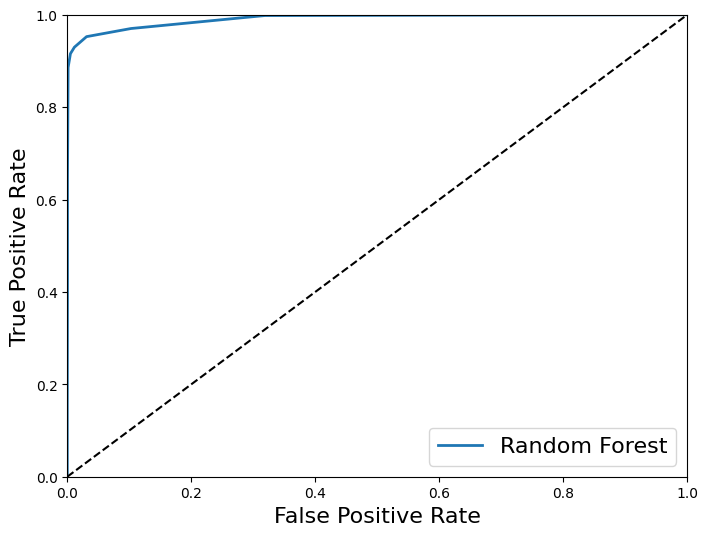

In [121]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_1, y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [122]:
roc_auc_score(y_train_1, y_scores_forest)

0.9907187924481683

### 2ème modèle : Perceptron

Nous allons maintenant entrainer un deuxième modèle sur les données d'entrainement.

Le deuxième modèle que nous allons entrainer utilise le modèle de Perceptron.

In [123]:
# Perceptron Model
perceptron_clf = Perceptron(random_state=42)

perceptron_scores = cross_val_predict(perceptron_clf, X_train_prepared, y_train_1, cv=10)

### Martrice de confusion

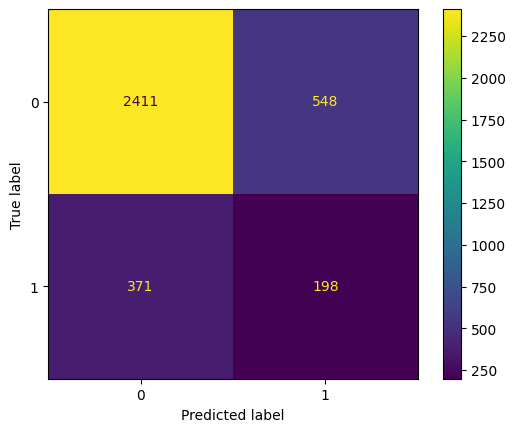

In [124]:
confMatrix = confusion_matrix(y_train_1, perceptron_scores)

disp = ConfusionMatrixDisplay(confusion_matrix=confMatrix)

disp.plot()

In [125]:
# Precision, Recall and F1 Score

perceptron_precision = precision_score(y_train_1, perceptron_scores)
perceptron_recall = recall_score(y_train_1, perceptron_scores)
perceptron_f1 = f1_score(y_train_1, perceptron_scores)

print(f'Precision: {perceptron_precision}')
print(f'Recall: {perceptron_recall}')
print(f'F1 Score: {perceptron_f1}')

Precision: 0.26541554959785524
Recall: 0.34797891036906853
F1 Score: 0.3011406844106464


In [126]:
y_scores_perceptron = cross_val_predict(perceptron_clf, X_train_prepared, y_train_1, cv=10, method="decision_function")

precisions_p, recalls_p, thresholds_p = precision_recall_curve(y_train_1, y_scores_perceptron)

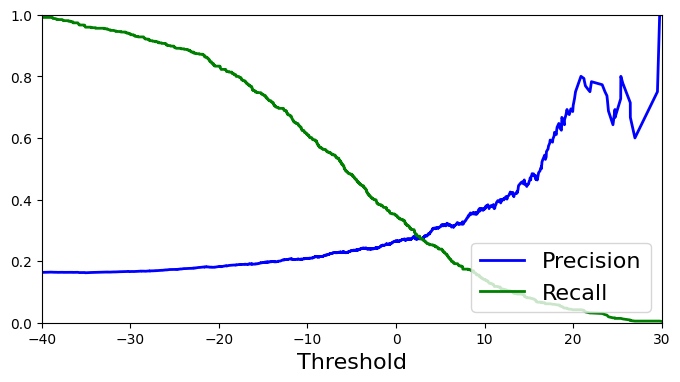

In [127]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_p, recalls_p, thresholds_p)
plt.xlim([-40, 30])
plt.show()

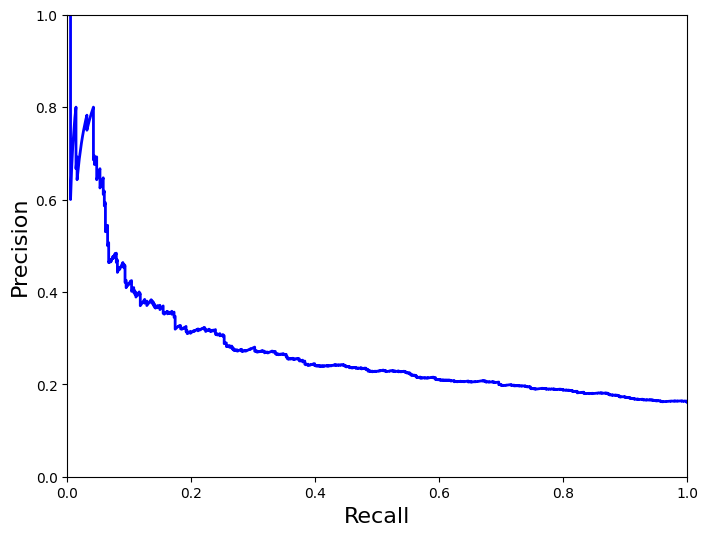

In [128]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_p, recalls_p)
plt.show()

### Courbe ROC

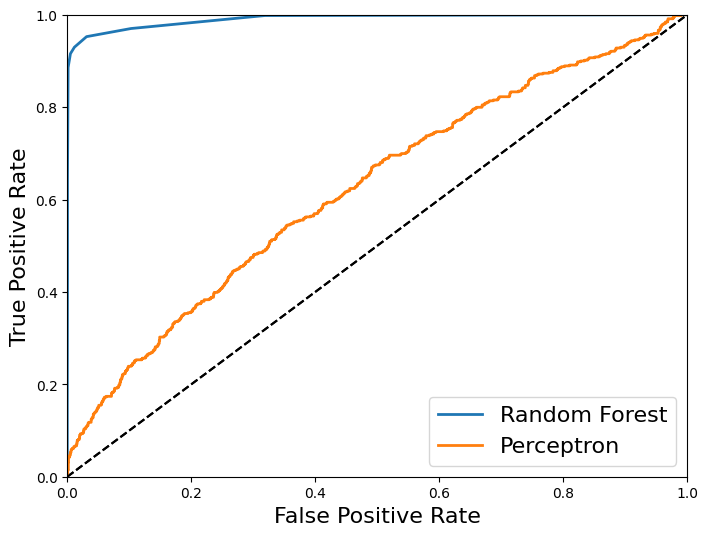

In [129]:
# ROC Curve with Random Forest Model and Perceptron Model
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_train_1, y_scores_perceptron)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_perceptron, tpr_perceptron, "Perceptron")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [130]:
roc_auc_score(y_train_1, y_scores_perceptron)

0.6231062957074156

### 3ème modèle : Le Classifieur Binaire

Nous allons entrainer un dernier modèle sur les données d'entrainement, afin de comparer les performances de chaque modèle.
Ce modèle est le classifieur binaire.

In [131]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train_1)

y_train_pred = cross_val_predict(sgd_clf, X_train_prepared, y_train_1, cv=10)

### Martrice de confusion

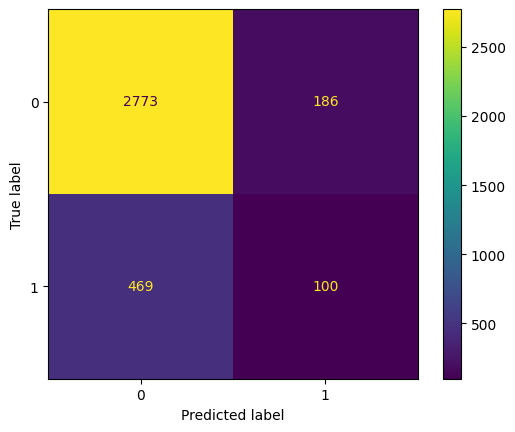

In [132]:
confMatrix = confusion_matrix(y_train_1, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confMatrix)

disp.plot()

In [133]:
# Precision, Recall and F1 Score

sgd_precision = precision_score(y_train_1, y_train_pred)
sgd_recall = recall_score(y_train_1, y_train_pred)
sgd_f1 = f1_score(y_train_1, y_train_pred)

print(f'Precision: {sgd_precision}')
print(f'Recall: {sgd_recall}')
print(f'F1 Score: {sgd_f1}')


Precision: 0.34965034965034963
Recall: 0.1757469244288225
F1 Score: 0.23391812865497075


In [134]:
y_train_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train_1, cv=10, method="decision_function")
precisions_binary,recalls_binary, thresholds_binary = precision_recall_curve(y_train_1, y_train_scores)

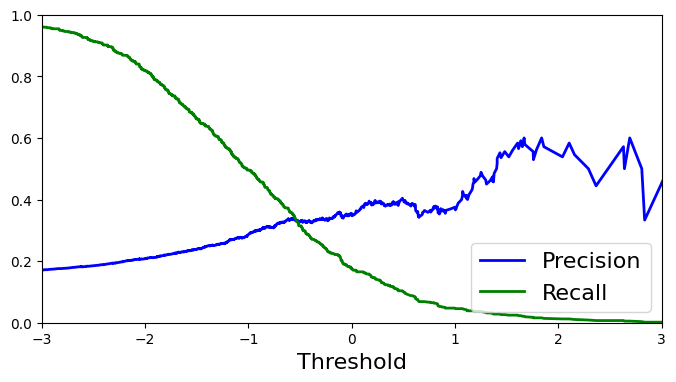

In [135]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_binary, recalls_binary, thresholds_binary)
plt.xlim([-3, 3])
plt.show()

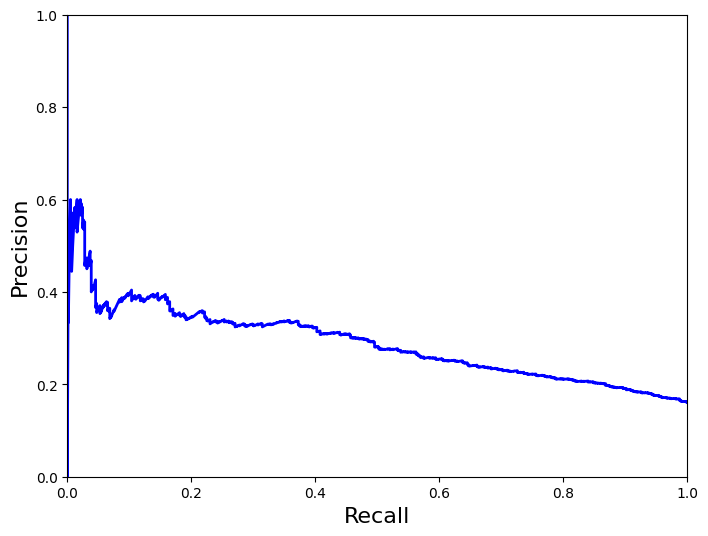

In [136]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_binary, recalls_binary)
plt.show()

In [137]:
fpr_binary, tpr_binary, thresholds_binary = roc_curve(y_train_1, y_train_scores)

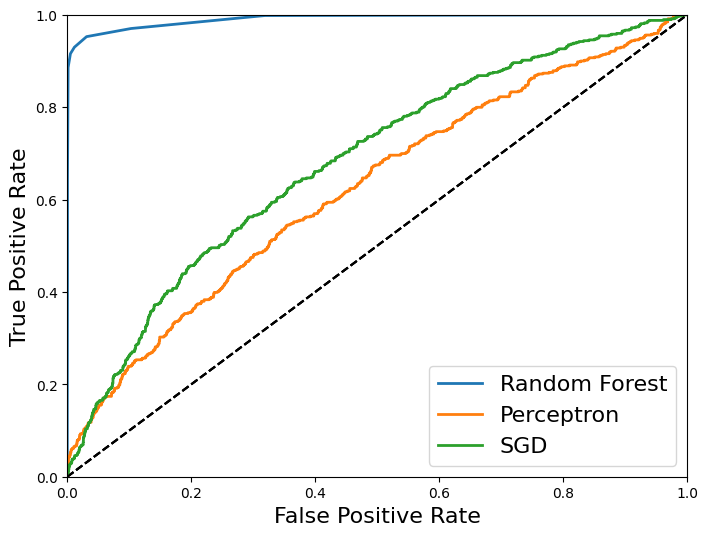

In [138]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_perceptron, tpr_perceptron, "Perceptron")
plot_roc_curve(fpr_binary, tpr_binary, "SGD")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [139]:
roc_auc_score(y_train_1, y_train_scores)

0.681263738580756

## Optimisation du meilleur modèle

Nous allons maintenant optimiser le meilleur modèle que nous avons obtenu.

En effet, nous avons obtenu de bons résultats avec le modèle de Random Forest, comparé aux deux autres modèles, mais nous allons essayer de l'optimiser pour obtenir de meilleurs résultats.

Nous allons utiliser la méthode de GridSearchCV pour optimiser les hyperparamètres du modèle.

In [140]:
# Grid Search for Random Forest Model

from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'bootstrap': [False, True],
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8],
        'max_depth': [3, 10, 40, 70, 100],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10]
    }
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)


In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

> **Remarque** : le meilleur résultat étant obtenu pour des vaeurs au alentours de 
> - *'bootstrap': False*,
> - *'max_features': 4*,
> - *'max_depth': 40*,
> - *'min_samples_leaf': 1*,
> - *'min_samples_split': 2*,
> - *'n_estimators': 10*.
 
Il semble pertinent de chercher des hyperparamètres aux alentours de ces valeurs.

Pour chercher des vaeurs dans un interval, nous utilisons la méthode de RandomizedSearchCV qui permet de chercher des valeurs aléatoires dans un interval.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = [
    {
        'bootstrap': [False],
        'n_estimators': randint(low=7, high=13),
        'max_features': randint(low=3, high=5),
        'max_depth': randint(low=20, high=60),
        'min_samples_leaf': [1],
        'min_samples_split': [2]
    }
]

rdm_search = RandomizedSearchCV(forest_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rdm_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   param_distributions=[{'bootstrap': [False],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029628B463E0>,
                                         'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029628B44040>,
                                         'min_samples_leaf': [1],
                                         'min_samples_split': [2],
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029628B472E0>}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
rdm_search.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 11}

Grace à RandomizedSearchCV, nous avons pu trouver les paramètres optimaux pour notre modèle.

A présent, nous pouvons lister l'importance des features pour notre modèle, et donc déterminer les features les plus importantes pour prédire le départ d'un employé.



In [ ]:
feature_importances = rdm_search.best_estimator_.feature_importances_

# Displaying the feature importances
attributes = num_attribs.tolist() + cat_attribs.tolist()
sorted(zip(feature_importances, attributes), reverse=True)


[(0.10558709964562238, 'Age'),
 (0.07912060165535373, 'DistanceFromHome'),
 (0.07859028803773166, 'YearsWithCurrManager'),
 (0.0641708118888553, 'PercentSalaryHike'),
 (0.05646981254357721, 'NumCompaniesWorked'),
 (0.045610831430866236, 'EnvironmentSatisfaction'),
 (0.04442685012622144, 'TrainingTimesLastYear'),
 (0.043777138615373516, 'JobSatisfaction'),
 (0.04299711007954663, 'Education'),
 (0.03829807200873127, 'WorkLifeBalance'),
 (0.0348967627556894, 'JobLevel'),
 (0.032442216796244906, 'JobInvolvement'),
 (0.030429430015573876, 'StockOptionLevel'),
 (0.019878201698458487, 'Department'),
 (0.017540086658588003, 'Gender'),
 (0.014512144661558302, 'MaritalStatus'),
 (0.01306633707806877, 'EducationField'),
 (0.010402012369235157, 'JobRole'),
 (0.00890944151333397, 'BusinessTravel')]

Nous constatons que les features les plus importantes pour prédire le départ d'un employé sont:
- *Age*
- *DistanceFromHome*
- *YearsWithCurrManager*

### Evaluation du modèle optimisé sur le jeu de test

Pour finir, nous allons évaluer le modèle optimisé sur le jeu de test, et vérifier que les résultats sont toujours satisfaisants.

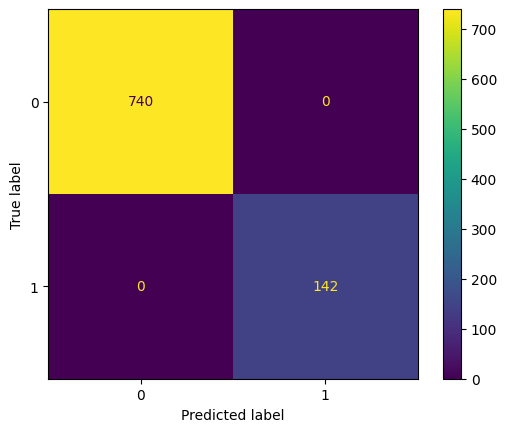

In [ ]:
final_model = rdm_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_confMatrix = confusion_matrix(y_test, final_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=final_confMatrix)

disp.plot()

In [ ]:
final_precision = precision_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)

print(f'Precision: {final_precision}')
print(f'Recall: {final_recall}')
print(f'F1 Score: {final_f1}')

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Conclusion

Nous constatons que nous avons de très bons résultats pour notre modèle optimisé, avec un F1-score de 1,0.

Nous sommes odnc capable de prédire le départ d'un employé avec une très grande précision.

Cependant, il est important de noter que nous avons un jeu de données assez petit, et que les résultats pourraient être différents sur un jeu de données plus grand.

De plus, il est possible que le modèle soir sur-entrainé, et donc qu'il ne soit pas capable de prédire correctement les données d'un autre jeu de données, car si le modèle possède un F1-score de 1,0, cela signifie que nous devrions être capable de prédire toutes les données correctement, ce qui est en réalité très peu probable.

Il est donc important de prendre ces résultats avec des pincettes, et de les vérifier sur un jeu de données plus grand.